# Time Series Forecasting for Stock Market with LSTM NETWORK 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_ta as ta

In [2]:
df = pd.read_csv(r"C:\Users\arjun\Desktop\infolimpioavanzadoTarget.csv\infolimpioavanzadoTarget.csv")
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [3]:
selected_col= ['date', 'open', 'high', 'low','close', 'adjclose', 'volume','ticker', 'TARGET']
drop_col=[]
for col in df.columns:
    if col not in selected_col:
        drop_col.append(col)
df.drop(columns=drop_col, inplace=True)
print(drop_col)

['RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0', 'MACDdif-adjclose-25-1', 'MACDdif-adjclose-25-2', 'MACDdif-adjclose-25-3', 'MACDsig-volume-25', 'MACDdif-volume-25-0', 'MACDdif-volume-25-1', 'MACDdif-volume-25-2', 'MACDdif-volume-25-3', 'MACDsig-adjclose-50', 'MACDdif-adjclose-50-0', 'MACDdif-adjclose-50-1', 'MACDdif-adjclose-50-2', 'MACDdif-adjclose-50-3', 'MACDsig-volume-50', 'MACDdif-volume-50-0', 'MACDdif-volume-50-1', 'MACDdif-volume-50-2', 'MACDdif-volume-50-3', 'MACDhistadjclose15', 'MACDhistvolume15', 'MACDhistadjclose25', 'MACDhistvolume25', 'MACDhist

In [64]:
df

,date,open,high,low,close,adjclose,volume,ticker,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,0
...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,0


In [4]:
import pandas as pd
import pandas_ta as ta


tickers_to_plot = ['ASLE', 'ASUR', 'ATLCP', 'ATLCL', 'ATLC', 'ATIF', 'ATHX', 'ATHE', 'ATHA', 'ATEX',
                   'ATER', 'ATEC', 'ATCOL', 'ATAI', 'ASYS', 'ASTS', 'ASLN', 'ASTR', 'ASTL', 'ASTE',
                   'ASTC', 'ASRV', 'ASRT', 'ASPS', 'ASPAU', 'ASPA', 'ASO', 'ASND', 'ASML', 'ASMB', 'ATLO']


indicators = pd.concat([
    pd.DataFrame({f'{ticker}_RSI': ta.rsi(df['adjclose'], length=15) for ticker in tickers_to_plot}),
    pd.DataFrame({f'{ticker}_EMA_20': ta.ema(df['adjclose'], length=20) for ticker in tickers_to_plot}),
    pd.DataFrame({f'{ticker}_EMA_100': ta.ema(df['adjclose'], length=100) for ticker in tickers_to_plot}),
    pd.DataFrame({f'{ticker}_EMA_150': ta.ema(df['adjclose'], length=150) for ticker in tickers_to_plot})
], axis=1)

df = pd.concat([df, indicators], axis=1)

df['Target'] = df['adjclose'] - df['open']
df['TargetClass'] = [1 if x > 0 else 0 for x in df['Target']]
df['TargetNextClose'] = df['adjclose'].shift(-1)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) 
df.drop(['volume', 'close', 'date'], axis=1, inplace=True)


print(df)


           open       high        low   adjclose ticker  TARGET   ASLE_RSI  \
0     18.209999  18.410000  17.879999  18.110001   ASLE       1  75.988822   
1     19.049999  20.500000  18.799999  20.000000   ASLE       0  85.387137   
2     20.420000  20.490000  19.820000  20.100000   ASLE       0  85.704345   
3     20.190001  20.680000  19.860001  20.040001   ASLE       0  84.524834   
4     20.309999  20.895000  20.150000  20.330000   ASLE       0  85.554384   
...         ...        ...        ...        ...    ...     ...        ...   
7626  23.330000  23.379999  23.049999  22.709673   ATLO       0  61.092637   
7627  23.250000  23.540001  23.250000  22.699928   ATLO       0  60.782257   
7628  23.350000  23.610001  23.250000  22.758406   ATLO       0  62.022803   
7629  23.450001  23.570000  23.219999  22.758406   ATLO       0  62.022803   
7630  23.330000  23.740000  23.330000  23.011820   ATLO       0  67.186409   

       ASUR_RSI  ATLCP_RSI  ATLCL_RSI  ...  ASPAU_EMA_150  ASPA

In [5]:
features_per_ticker = 4
data_set = df.iloc[:, 0:(len(tickers_to_plot) * features_per_ticker)]
pd.set_option('display.max_columns', None)
print(data_set.head(20))

         open       high        low   adjclose ticker  TARGET   ASLE_RSI  \
0   18.209999  18.410000  17.879999  18.110001   ASLE       1  75.988822   
1   19.049999  20.500000  18.799999  20.000000   ASLE       0  85.387137   
2   20.420000  20.490000  19.820000  20.100000   ASLE       0  85.704345   
3   20.190001  20.680000  19.860001  20.040001   ASLE       0  84.524834   
4   20.309999  20.895000  20.150000  20.330000   ASLE       0  85.554384   
5   20.330000  20.566000  20.100000  20.170000   ASLE       0  82.317046   
6   20.150000  20.500000  19.790001  19.830000   ASLE       0  75.787732   
7   17.400000  19.030001  17.250000  18.430000   ASLE       1  56.141685   
8   18.480000  19.320000  18.389999  19.170000   ASLE       1  61.756109   
9   19.000000  19.209999  18.070000  18.350000   ASLE       1  53.608466   
10  18.160000  19.719999  18.160000  19.059999   ASLE       0  58.667328   
11  19.219999  19.969999  18.940001  19.580000   ASLE       0  61.925386   
12  19.62999

In [ ]:
#1. Ticker Selection:
# tickers_to_extract: This list holds the tickers you're interested in analyzing, including "ASLE".
# ticker = 'ASLE': This line chooses "ASLE" as the star of the show for prediction

In [8]:
tickers_to_extract = ['ASLE', 'ASUR', 'ATLCP', 'ATLCL', 'ATLC', 'ATIF', 'ATHX', 'ATHE', 'ATHA', 'ATEX',
                      'ATER', 'ATEC', 'ATCOL', 'ATAI', 'ASYS', 'ASTS', 'ASLN', 'ASTR', 'ASTL', 'ASTE',
                      'ASTC', 'ASRV', 'ASRT', 'ASPS', 'ASPAU', 'ASPA', 'ASO', 'ASND', 'ASML', 'ASMB', 'ATLO']

ticker_data = {}
selected_ticker = input("Enter the ticker you want to analyze: ")

if selected_ticker.upper() not in tickers_to_extract:
    print("Invalid ticker")
    print(tickers_to_extract)
else:
    ticker_columns = [col for col in df.columns if col.startswith(f'{selected_ticker.upper()}_')]
    ticker_data[selected_ticker.upper()] = df[ticker_columns].copy()
    print(ticker_data[selected_ticker.upper()])


Enter the ticker you want to analyze: ASLE
       ASLE_RSI  ASLE_EMA_20  ASLE_EMA_100  ASLE_EMA_150
0     75.988822    17.022510     15.545765     15.224067
1     85.387137    17.306080     15.633967     15.287324
2     85.704345    17.572168     15.722404     15.351068
3     84.524834    17.807200     15.807901     15.413173
4     85.554384    18.047466     15.897447     15.478297
...         ...          ...           ...           ...
7626  61.092637    22.362707     21.895284     21.798495
7627  60.782257    22.394823     21.911218     21.810435
7628  62.022803    22.429450     21.927994     21.822991
7629  62.022803    22.460779     21.944438     21.835380
7630  67.186409    22.513259     21.965574     21.850962

[7631 rows x 4 columns]


In [9]:
#Importing scaling tool to normalize data.
#Creating a scaler to map values between 0 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(ticker_data[selected_ticker])
print(data_set_scaled)

[[0.74116681 0.02541312 0.02793946 0.02729878]
 [0.84263278 0.02584805 0.02810683 0.02742284]
 [0.84605742 0.02625617 0.02827465 0.02754786]
 ...
 [0.59038703 0.03370611 0.04005025 0.04024098]
 [0.59038703 0.03375416 0.04008146 0.04026528]
 [0.64613429 0.03383465 0.04012156 0.04029584]]


In [ ]:
#LSTMs require 3D data as input, where each dimension represents samples, timesteps, and features.
#The code creates this format by constructing sequences of past values for each feature and stacking them as multiple channels.
#backcandles defines the length of each sequence, influencing how much past information the LSTM utilizes.

In [11]:
import numpy as np
data_set_scaled.shape
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(4):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])
X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

7631
[[[0.74116681 0.02541312 0.02793946 0.02729878]
  [0.84263278 0.02584805 0.02810683 0.02742284]
  [0.84605742 0.02625617 0.02827465 0.02754786]
  ...
  [0.57031977 0.03040252 0.03162451 0.03023334]
  [0.47396289 0.03035643 0.0317174  0.0303175 ]
  [0.50126058 0.03036147 0.03182049 0.03040885]]

 [[0.84263278 0.02584805 0.02810683 0.02742284]
  [0.84605742 0.02625617 0.02827465 0.02754786]
  [0.8333232  0.02661665 0.02843689 0.02766966]
  ...
  [0.47396289 0.03035643 0.0317174  0.0303175 ]
  [0.50126058 0.03036147 0.03182049 0.03040885]
  [0.47434973 0.03032513 0.031911   0.03049173]]

 [[0.84605742 0.02625617 0.02827465 0.02754786]
  [0.8333232  0.02661665 0.02843689 0.02766966]
  [0.84443841 0.02698517 0.02860681 0.02779739]
  ...
  [0.50126058 0.03036147 0.03182049 0.03040885]
  [0.47434973 0.03032513 0.031911   0.03049173]
  [0.47336944 0.03029079 0.03199936 0.03057324]]

 ...

 [[0.5454846  0.03274499 0.03934902 0.03971436]
  [0.53281852 0.03277068 0.03936481 0.03972538]
  [0.

In [ ]:
# Split data for training (80%) and testing (20%) to prevent overfitting and assess generalization.

In [12]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

6080
(6080, 30, 4)
(1521, 30, 4)
(6080, 1)
(1521, 1)
[[0.03049173]
 [0.03057324]
 [0.03062094]
 ...
 [0.00769681]
 [0.00765188]
 [0.00760755]]


# LSTM Neural Network for Sequential Prediction

1. It's a (LSTM) neural network, designed specifically for sequential data like time series
2. It has one LSTM layer with 150 units to capture long-term dependencies within sequences, followed by a dense layer with a single output neuron for prediction but you can also change it to 200 , 250, 300 to notice and capture more complex patterns,leading to better predictions.
3. It's trained using the Adam optimizer to minimize mean squared error (MSE), aiming for accurate predictions of continuous values.
4.Make sure to use early stopping to prevent overfitting when lstm is high .

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

if tf.__version__ >= '2.0':
    from tensorflow.compat.v1 import losses

model = Sequential()
model.add(LSTM(150, input_shape=(30, 4))) 
model.add(Dense(1, activation='linear'))

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer)

model.fit(X_train, y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

predictions = model.predict(X_test)
print(predictions)



Epoch 1/30
365/365 [==============================] - 18s 37ms/step - loss: 3.1922e-04 - val_loss: 1.5043e-05
Epoch 2/30
365/365 [==============================] - 12s 33ms/step - loss: 1.7063e-04 - val_loss: 3.2421e-06
Epoch 3/30
365/365 [==============================] - 15s 40ms/step - loss: 2.0056e-05 - val_loss: 4.1616e-06
Epoch 4/30
365/365 [==============================] - 14s 39ms/step - loss: 1.0474e-05 - val_loss: 1.1317e-06
Epoch 5/30
365/365 [==============================] - 12s 34ms/step - loss: 1.7915e-05 - val_loss: 2.1992e-05
Epoch 6/30
365/365 [==============================] - 11s 31ms/step - loss: 1.4855e-05 - val_loss: 9.6746e-06
Epoch 7/30
365/365 [==============================] - 12s 33ms/step - loss: 1.3137e-05 - val_loss: 3.9595e-06
Epoch 8/30
365/365 [==============================] - 12s 32ms/step - loss: 1.5481e-05 - val_loss: 1.4681e-06
Epoch 9/30
365/365 [==============================] - 14s 38ms/step - loss: 2.1113e-05 - val_loss: 3.5701e-07
Epoch 10/3

In [37]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

48/48 [==============================] - 1s 14ms/step
[0.00831326] [0.00756121]
[0.00822031] [0.00751808]
[0.00815753] [0.00747292]
[0.00806862] [0.00742316]
[0.00800416] [0.00737667]
[0.00794591] [0.00732819]
[0.00785822] [0.00728035]
[0.00780877] [0.00723055]
[0.00775129] [0.00718141]
[0.00769089] [0.00713292]


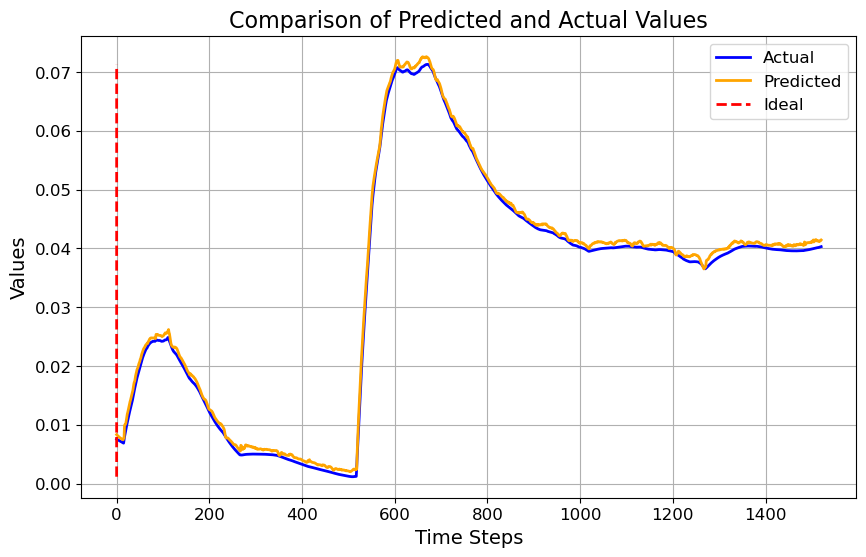

In [38]:
import matplotlib.pyplot as plt

predicted_values = y_pred
test_values = y_test

plt.figure(figsize=(10, 6)) 

plt.plot(test_values, color='blue', linewidth=2, label='Actual')

plt.plot(predicted_values, color='orange', linewidth=2, label='Predicted')

plt.xlabel('Time Steps', fontsize=14) 
plt.ylabel('Values', fontsize=14) 
plt.title('Comparison of Predicted and Actual Values', fontsize=16) 
plt.legend(fontsize=12)  
plt.grid(True)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.show()


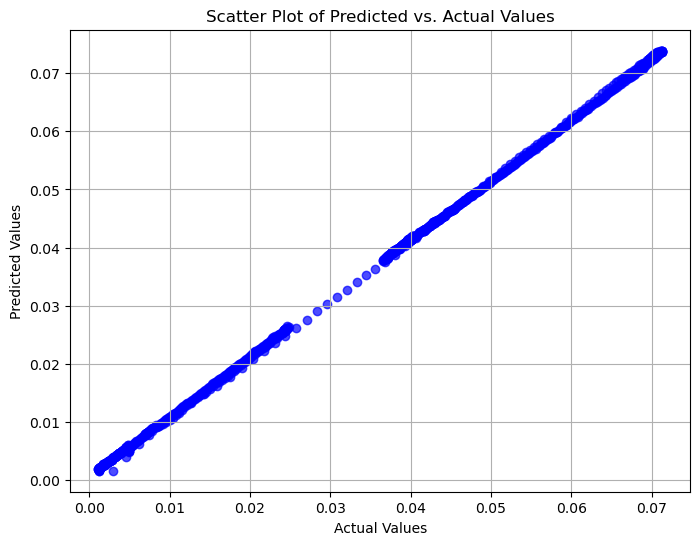

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(test_values, predicted_values, c='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()

# Customizable LSTM Architecture for Enhanced Performance
1. Dropout: Adding dropout layers to prevent overfitting, improving the model's ability.

2. Optimizer experimentation: Trying different optimizers like RMSprop or even you can try SGD which allows finding the one that best suits your data and optimizes learning.

3. Hyperparameter tuning: Increase flexibility lets you adjust critical parameters like units, learning rate, and batch size, fine-tuning the model for best results .

4. Model architecture enhancements: Consider using bidirectional LSTM for capturing information in all the directions or adding intermediate dense layers for more complex feature extraction.

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
365/365 [==============================] - 9s 17ms/step - loss: 4.5152e-04 - val_loss: 1.2290e-05
Epoch 2/30
365/365 [==============================] - 5s 15ms/step - loss: 2.7781e-05 - val_loss: 9.2496e-06
Epoch 3/30
365/365 [==============================] - 5s 15ms/step - loss: 6.1386e-05 - val_loss: 4.0938e-06
Epoch 4/30
365/365 [==============================] - 5s 14ms/step - loss: 2.3232e-05 - val_loss: 2.1794e-05
Epoch 5/30
365/365 [==============================] - 5s 14ms/step - loss: 2.7670e-05 - val_loss: 1.2901e-06
Epoch 6/30
365/365 [==============================] - 5s 13ms/step - loss: 4.0052e-05 - val_loss: 1.0676e-05
Epoch 7/30
365/365 [==============================] - 5s 14ms/step - loss: 1.5590e-05 - val_loss: 7.2892e-07
Epoch 8/30
365/365 [==============================] - 5s 14ms/step - loss: 1.0129e-05 - val_loss: 3.9486e-06
Epoch 9/30
365/365 [==============================] - 5s 14ms/step - loss: 7.4294e-06 - val_loss: 1.8661e-06
Epoch 10/30
365/365

In [22]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

48/48 [==============================] - 1s 8ms/step
[0.00795026] [0.00756121]
[0.00798285] [0.00751808]
[0.00819568] [0.00747292]
[0.00811142] [0.00742316]
[0.00795083] [0.00737667]
[0.00809253] [0.00732819]
[0.00803055] [0.00728035]
[0.00798789] [0.00723055]
[0.00789344] [0.00718141]
[0.00788425] [0.00713292]


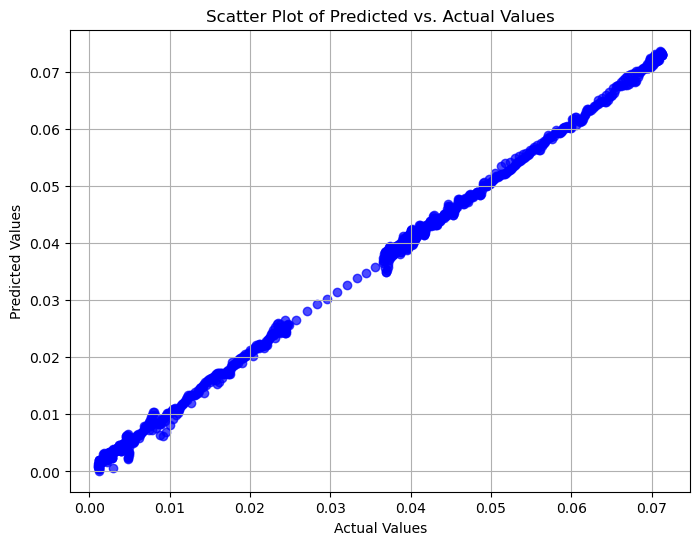

In [23]:
import matplotlib.pyplot as plt

predicted_values = y_pred
test_values = y_test

plt.figure(figsize=(8, 6))
plt.scatter(test_values, predicted_values, c='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()



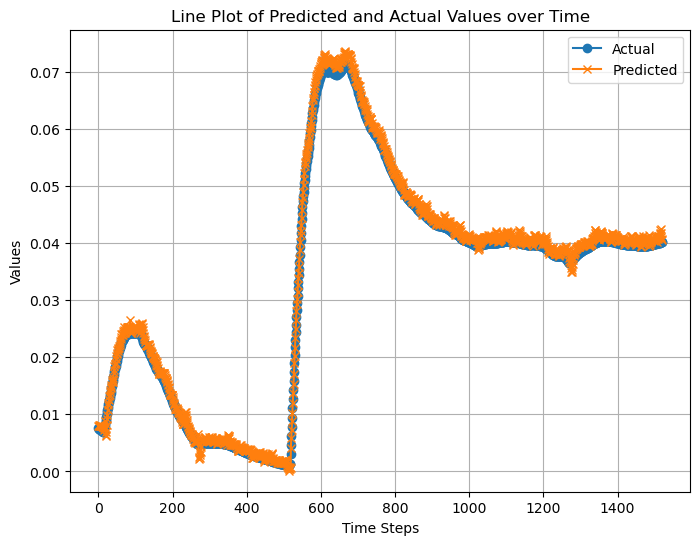

In [24]:
time_steps = range(len(test_values))
plt.figure(figsize=(8, 6))
plt.plot(time_steps, test_values, label='Actual', marker='o', linestyle='-')
plt.plot(time_steps, predicted_values, label='Predicted', marker='x', linestyle='-')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Line Plot of Predicted and Actual Values over Time')
plt.legend()
plt.grid(True)
plt.show()


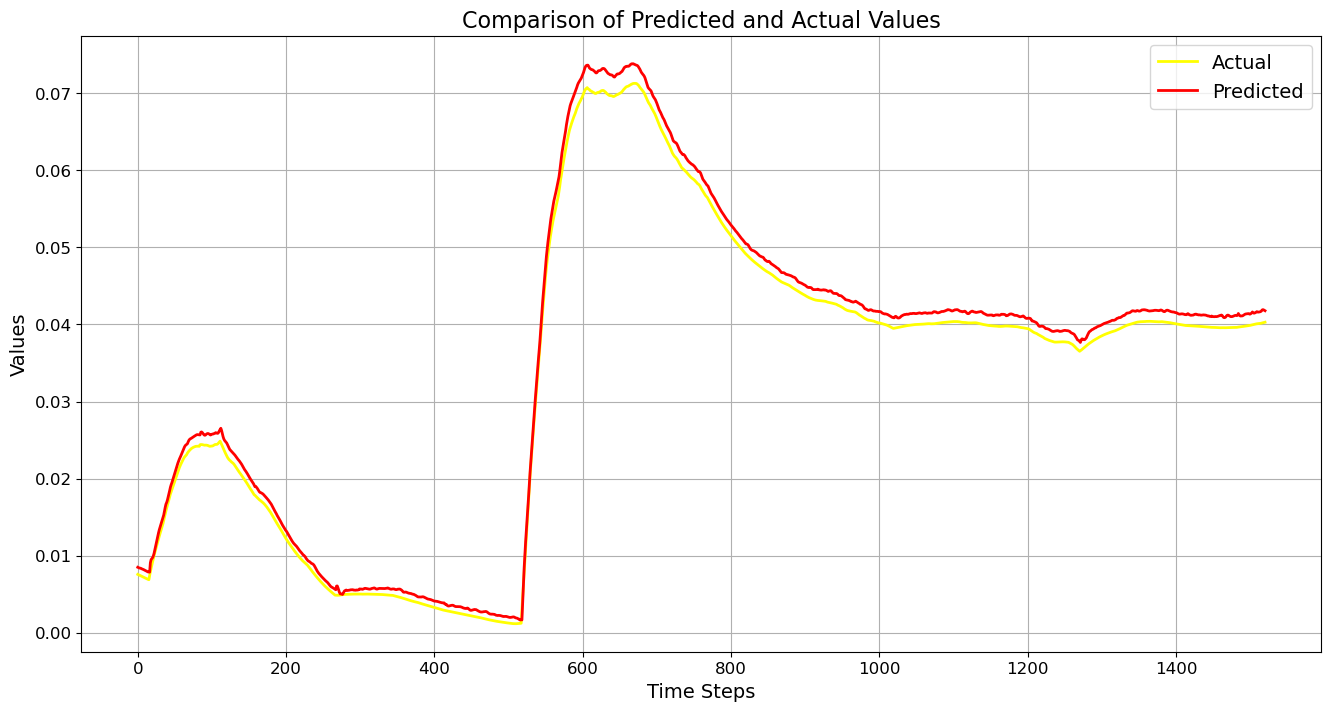

In [49]:
import matplotlib.pyplot as plt

predicted_values = y_pred
test_values = y_test

plt.figure(figsize=(16, 8))
plt.plot(test_values, color='yellow', label='Actual', linewidth=2)
plt.plot(predicted_values, color='red', label='Predicted', linewidth=2)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Values', fontsize=14) 
plt.title('Comparison of Predicted and Actual Values', fontsize=16)  # Add a descriptive title
plt.legend(fontsize=14)  # Make legend text larger for readability
plt.grid(True)  # Add grid lines for visual guidance
plt.xticks(fontsize=12)  # Adjust tick label size for better visibility
plt.yticks(fontsize=12)

plt.show()


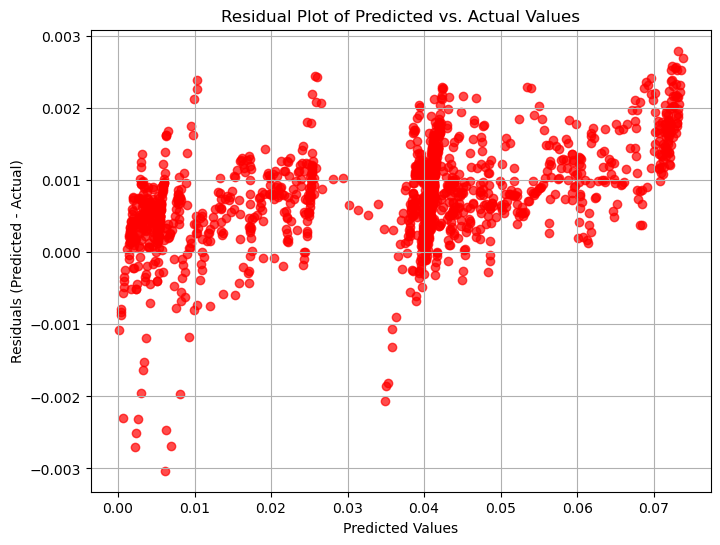

In [25]:

residuals = predicted_values - test_values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, c='red', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residual Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()


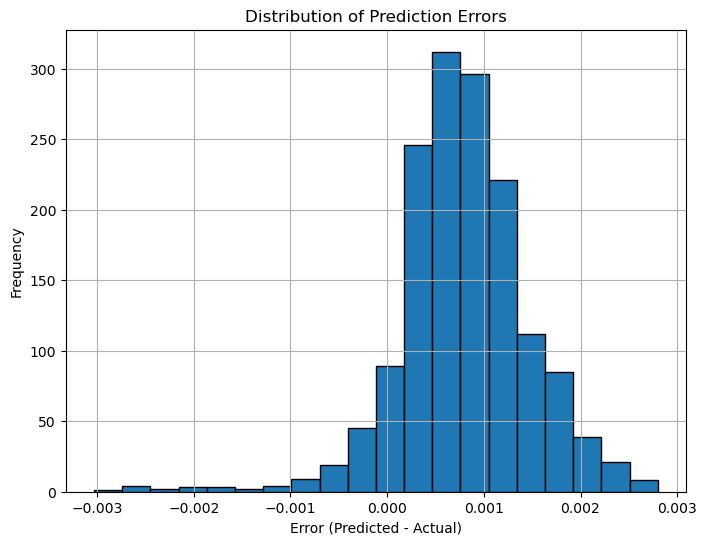

In [26]:

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()



C:\Users\arjun\AppData\Local\Temp\ipykernel_6624\3654114130.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, color='green')


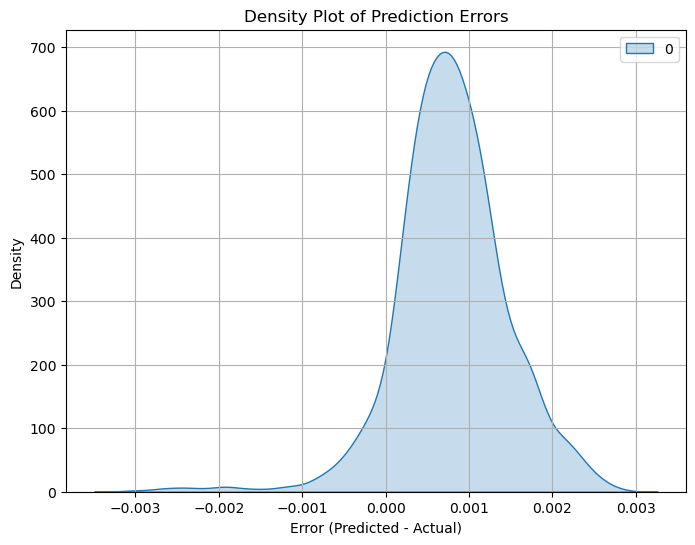

In [27]:

plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, shade=True, color='green')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.grid(True)
plt.show()
